In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [28]:
df = pd.read_csv("employe.csv")
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [29]:
df.columns = df.columns.str.strip().str.lower()
print("Column names after cleaning:", df.columns.tolist())

Column names after cleaning: ['satisfactorylevel', 'lastevaluation', 'numberofprojects', 'avgmonthlyhours', 'timespent.company', 'workaccident', 'left', 'promotioninlast5years', 'dept', 'salary']


In [30]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe(include='all'))

Dataset Shape: (14999, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactorylevel      14999 non-null  float64
 1   lastevaluation         14999 non-null  float64
 2   numberofprojects       14999 non-null  int64  
 3   avgmonthlyhours        14999 non-null  int64  
 4   timespent.company      14999 non-null  int64  
 5   workaccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotioninlast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Missing Values:
satisfactorylevel        0
lastevaluation           0
numberofprojects         0
avgmonthlyhours          0
timespent.company        0
workac

In [31]:
total_employees = df.shape[0]
employees_left = df[df['left'] == 1].shape[0]
attrition_rate = round((employees_left / total_employees) * 100, 2)

print(f"\n🔢 Total Employees: {total_employees}")
print(f"👋 Employees Left: {employees_left}")
print(f"📉 Attrition Rate: {attrition_rate}%")



🔢 Total Employees: 14999
👋 Employees Left: 3571
📉 Attrition Rate: 23.81%


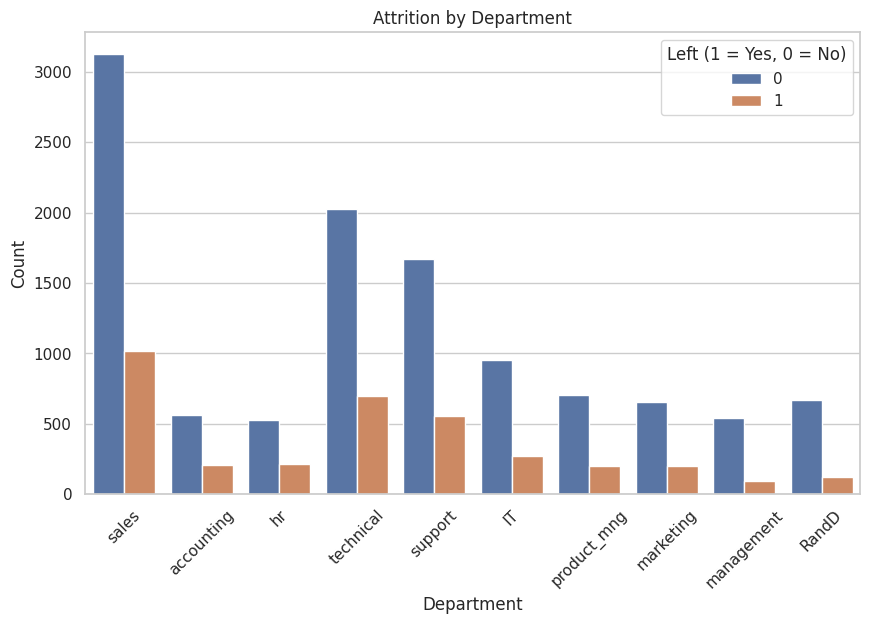

In [32]:
sns.countplot(data=df, x='dept', hue='left')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Left (1 = Yes, 0 = No)')
plt.xticks(rotation=45)
plt.show()

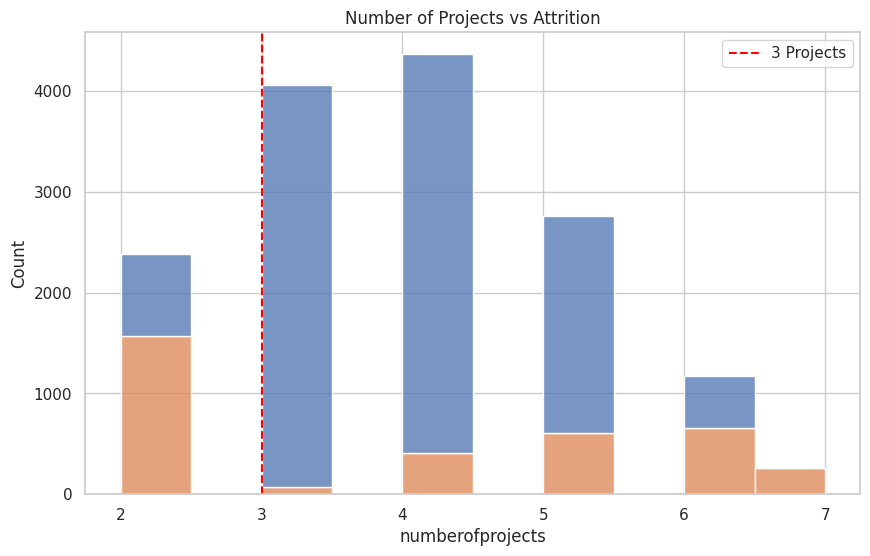

In [33]:
sns.histplot(data=df, x='numberofprojects', hue='left', multiple='stack', bins=10)
plt.axvline(3, color='red', linestyle='--', label='3 Projects')
plt.title('Number of Projects vs Attrition')
plt.legend()
plt.show()

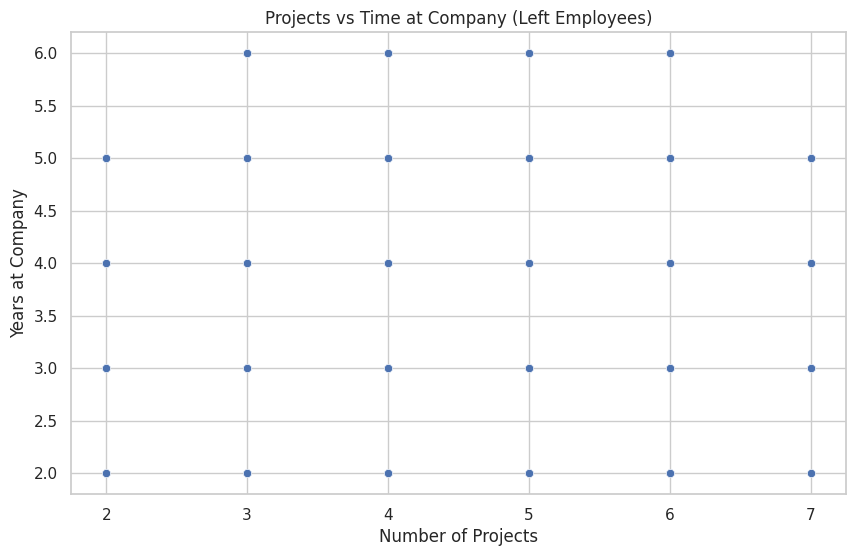

In [34]:
left_df = df[df['left'] == 1]
sns.scatterplot(data=left_df, x='numberofprojects', y='timespent.company')
plt.title('Projects vs Time at Company (Left Employees)')
plt.xlabel('Number of Projects')
plt.ylabel('Years at Company')
plt.show()

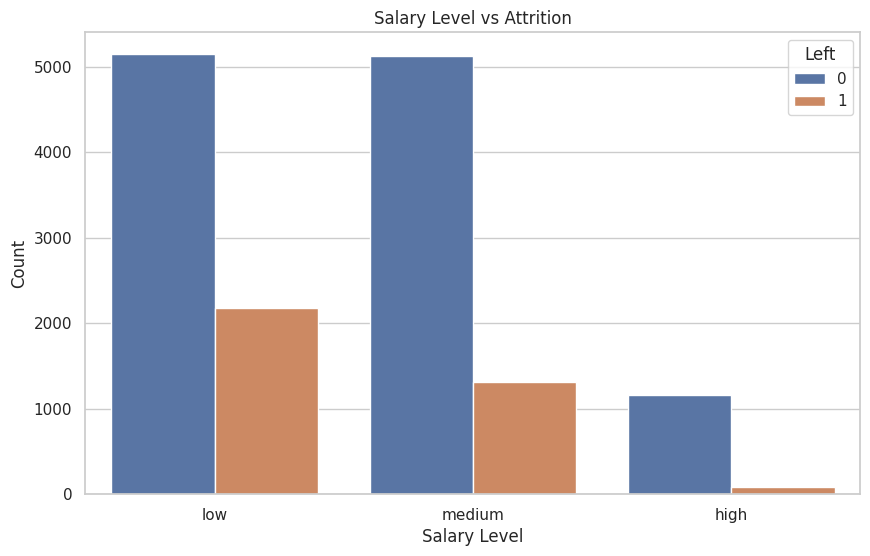

In [35]:
sns.countplot(data=df, x='salary', hue='left', order=['low', 'medium', 'high'])
plt.title('Salary Level vs Attrition')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

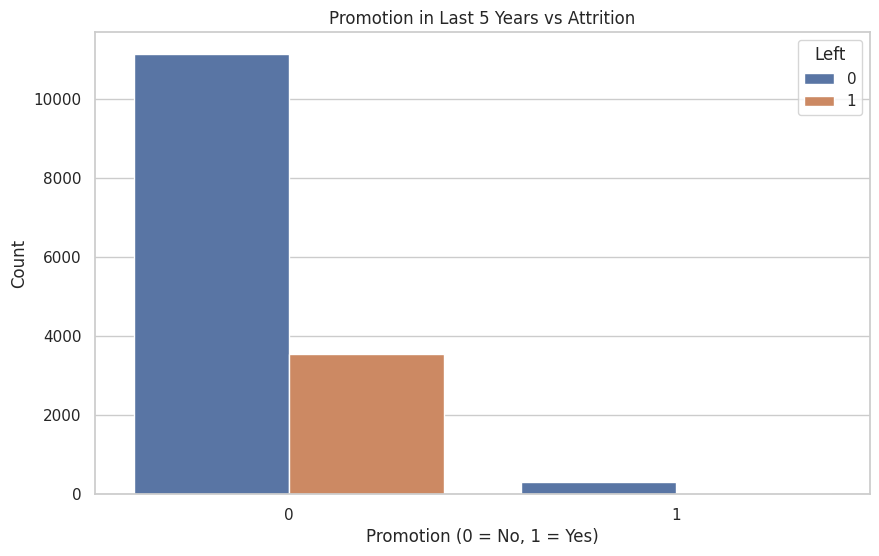

In [36]:
sns.countplot(data=df, x='promotioninlast5years', hue='left')
plt.title('Promotion in Last 5 Years vs Attrition')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

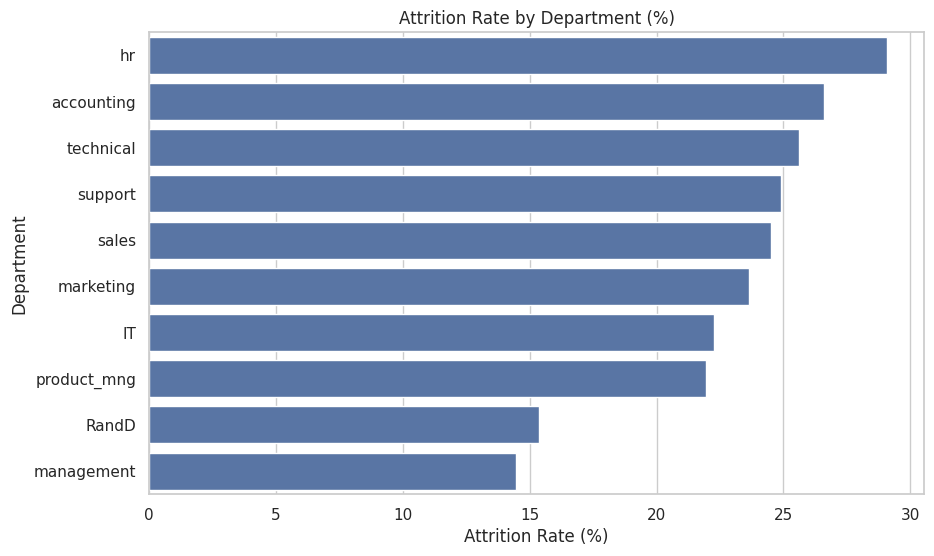

In [37]:
dept_total = df['dept'].value_counts()
dept_left = df[df['left'] == 1]['dept'].value_counts()
dept_attrition_rate = (dept_left / dept_total) * 100
dept_attrition_rate = dept_attrition_rate.sort_values(ascending=False)

sns.barplot(x=dept_attrition_rate.values, y=dept_attrition_rate.index)
plt.title('Attrition Rate by Department (%)')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')
plt.show()

In [38]:
print("""
🔍 Key Insights:
- Some departments show higher attrition.
- Employees with fewer than 3 projects tend to leave more.
- Low salary levels are strongly associated with higher attrition.
- Lack of promotion in the last 5 years may lead to employee exit.

✅ Recommendations:
1. Implement personalized career growth and promotion plans.
2. Ensure fair project distribution to keep employees engaged.
3. Reassess the compensation model to support retention.
4. Focus on improving conditions in high-attrition departments.
""")


🔍 Key Insights:
- Some departments show higher attrition.
- Employees with fewer than 3 projects tend to leave more.
- Low salary levels are strongly associated with higher attrition.
- Lack of promotion in the last 5 years may lead to employee exit.

✅ Recommendations:
1. Implement personalized career growth and promotion plans.
2. Ensure fair project distribution to keep employees engaged.
3. Reassess the compensation model to support retention.
4. Focus on improving conditions in high-attrition departments.

